# Foreground Separation using COCO API

In [ ]:
# Foreground separation using annotations - Working

import json
from pycocotools.coco import COCO
import cv2
import numpy as np
import os

# Load the COCO annotations
ann_file = "C:/Users/mukun/Desktop/Workshop Image Dataset Generation/DATASET/annotations_trainval2017/annotations/instances_train2017.json"
coco = COCO(ann_file)

# Load the image
img_dir = "C:/Users/mukun/Desktop/Workshop Image Dataset Generation/train2017/train2017"

# Get all image IDs in the dataset
img_ids = coco.imgs.keys()

# Iterate over the image IDs
for img_id in img_ids:
    # Load the image
    img = cv2.imread(os.path.join(img_dir, '%012d.jpg' % img_id))

    # Get the object instances for the image
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)

    # Create a binary mask for the background
    mask = np.ones(img.shape[:2], np.uint8)
    for ann in anns:
        mask[coco.annToMask(ann)==1] = 0

    # Subtract the image with the binary mask to extract the background
    img = cv2.subtract(img, img * mask[:,:,np.newaxis])

    # Save the output image
    cv2.imwrite(os.path.join("C:/Users/mukun/Desktop/Workshop Image Dataset Generation/train fg separation", '%012d.jpg' % img_id), img)

## Examples

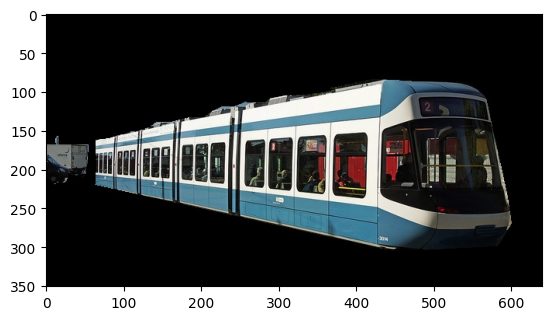

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val fg separation/000000006040.jpg')
plt.imshow(original_img)

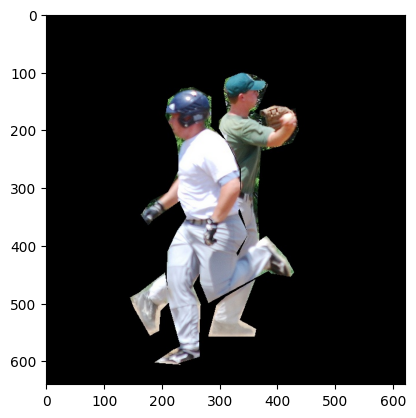

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val fg separation/000000000872.jpg')
plt.imshow(original_img)

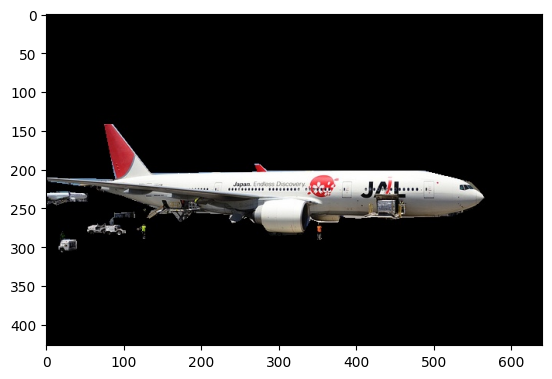

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val fg separation/000000013348.jpg')
plt.imshow(original_img)

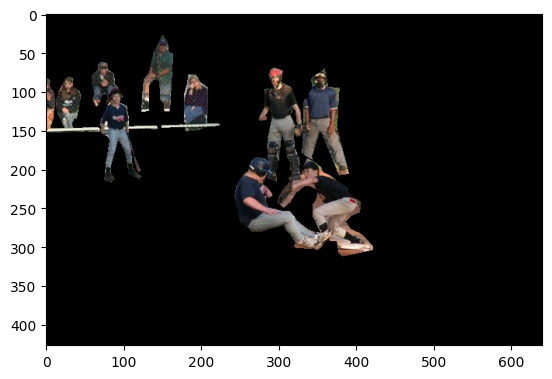

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val fg separation/000000018491.jpg')
plt.imshow(original_img)

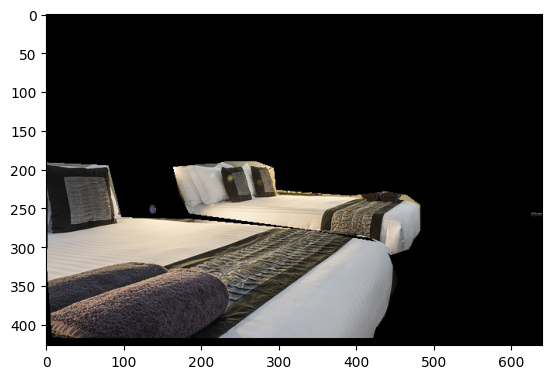

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val fg separation/000000007795.jpg')
plt.imshow(original_img)

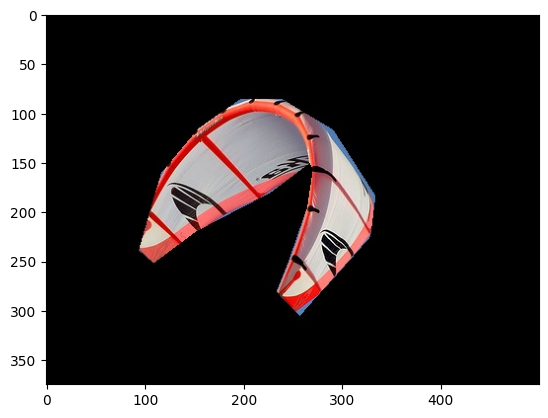

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val fg separation/000000007784.jpg')
plt.imshow(original_img)

# Background Separation Using COCO API

In [ ]:
# Background separation using annotations - Working

import json
from pycocotools.coco import COCO
import cv2
import numpy as np
import os

# Load the COCO annotations
ann_file = "C:/Users/mukun/Desktop/Workshop Image Dataset Generation/DATASET/annotations_trainval2017/annotations/instances_train2017.json"
coco = COCO(ann_file)

# Load the image
img_dir = "C:/Users/mukun/Desktop/Workshop Image Dataset Generation/train2017/train2017"

# Get all image IDs in the dataset
img_ids = coco.imgs.keys()

# Iterate over the image IDs
for img_id in img_ids:
    # Load the image
    img = cv2.imread(os.path.join(img_dir, '%012d.jpg' % img_id))

    # Get the object instances for the image
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)

    # Create a binary mask for the foreground
    mask = np.zeros(img.shape[:2], np.uint8)
    for ann in anns:
        mask[coco.annToMask(ann)==1] = 1

    # Subtract the binary mask from the image to extract the background
    img = cv2.subtract(img, img * mask[:,:,np.newaxis])

    # Save the output image
    cv2.imwrite(os.path.join("C:/Users/mukun/Desktop/Workshop Image Dataset Generation/train bg separation", '%012d.jpg' % img_id), img)

## Examples

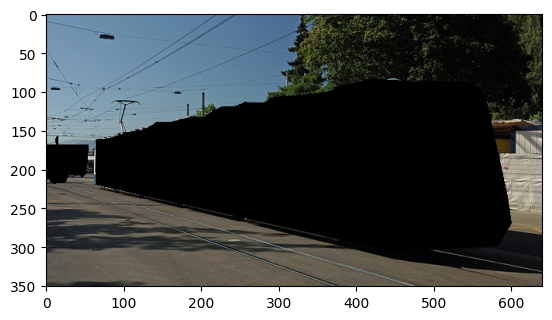

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val bg separation/000000006040.jpg')
plt.imshow(original_img)

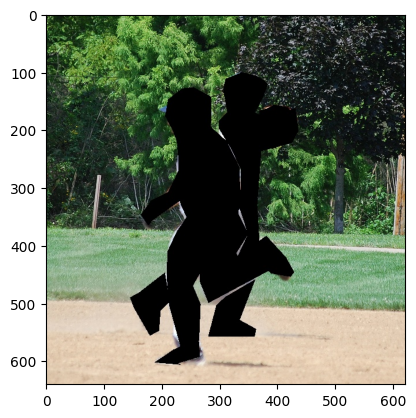

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val bg separation/000000000872.jpg')
plt.imshow(original_img)

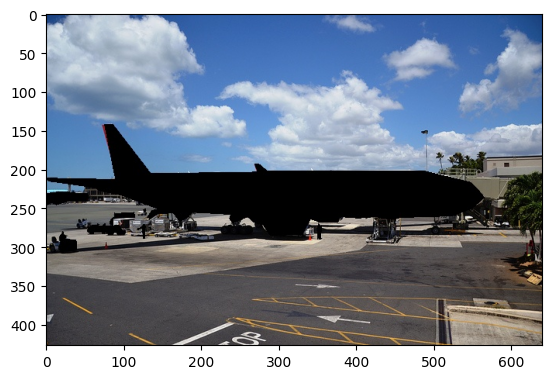

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val bg separation/000000013348.jpg')
plt.imshow(original_img)

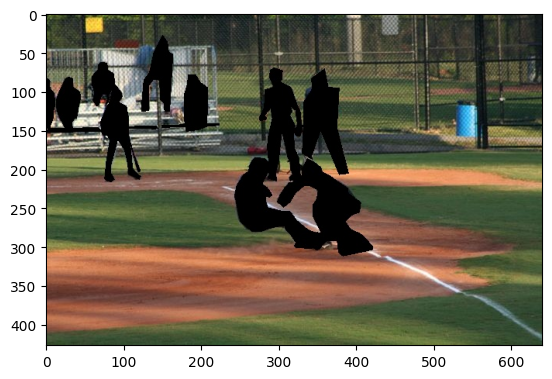

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val bg separation/000000018491.jpg')
plt.imshow(original_img)

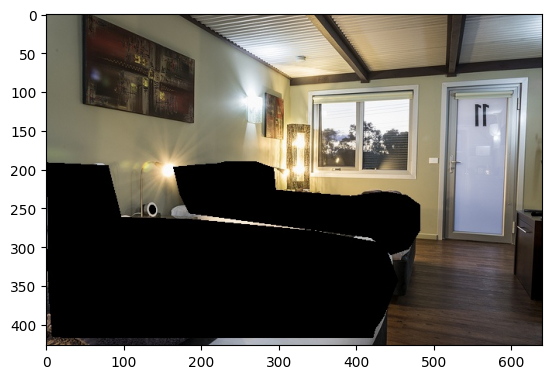

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val bg separation/000000007795.jpg')
plt.imshow(original_img)

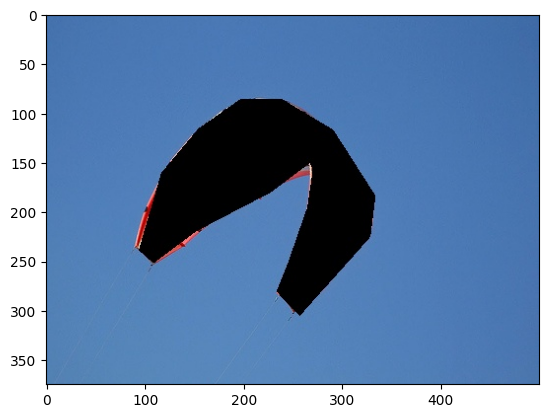

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val bg separation/000000007784.jpg')
plt.imshow(original_img)

# Foreground Blurring using Randomized Motion Blur Kernel

In [ ]:
# Using the motion blur kernel from the MTech Thesis

import numpy as np
import cv2
# from google.colab.patches import cv2_imshow
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
# import random
from random import randrange,random,choice
import time

def blurkernel(i): # takes parameters for blurring as input as an array 'i'.
  ker_size=2*i[0]+1;  # The first parameter is (kernel_size-1)/2.
  blur=np.zeros((ker_size,ker_size))
  # blur[i[0],i[0]:ker_size] = (1/(i[0]+1))*np.ones(i[0]+1)

  #implementing non-symmetric blurring for realistic blurring.
  blur[i[0],:]= (1/(ker_size))*np.ones(ker_size)

  # blur[i[0],0:ker_size+1]=(1/ker_size)*np.ones(ker_size) #symmetric blurring
  
  if i[1]!=0:     # the second parameter is blur angle.
    (h, w) = blur.shape
    (cX, cY) = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D((cX, cY), i[1], 1.0)
    rotated = cv2.warpAffine(blur, M, (w, h))
  else:
    rotated=blur
  rotated=rotated/rotated.sum()
  return rotated

def motionblur(image,i):
  ker_size=2*i[0]+1;
  blur=np.zeros((ker_size,ker_size))
  # blur[i[0],i[0]:ker_size] = (1/(i[0]+1))*np.ones(i[0]+1)
  blur[i[0],:]= (1/(ker_size))*np.ones(ker_size)
  # blur[i[0],0:ker_size+1]=(1/ker_size)*np.ones(ker_size) #symmetric blurring
  if i[1]!=0:
    (h, w) = blur.shape
    (cX, cY) = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D((cX, cY), i[1], 1.0)
    rotated = cv2.warpAffine(blur, M, (w, h))
  else:
    rotated=blur
  rotated=rotated/rotated.sum()
  # plt.figure()
  # plt.imshow(rotated,cmap='gray')
  # plt.title("blur applied")
  output = cv2.filter2D(image,-1,rotated,borderType=cv2.BORDER_CONSTANT  )
  return output

  # Iterating through the entire validation dataset foreground images to induce random motion blur

img_dir = "C:/Users/mukun/Desktop/Workshop Image Dataset Generation/GOOD RESULTS/TRAIN/train fg separation"
blurred_img_dir = "C:/Users/mukun/Desktop/Workshop Image Dataset Generation/train fg blurred"
for filename in os.listdir(img_dir):
    img = cv2.imread(os.path.join(img_dir, filename))
    ker_size = randrange(2,11)*2+1
    angle = choice([0,randrange(1,360)])
    output_img = motionblur(img,[ker_size,angle])
    cv2.imwrite(os.path.join(blurred_img_dir, filename), output_img)

## Examples

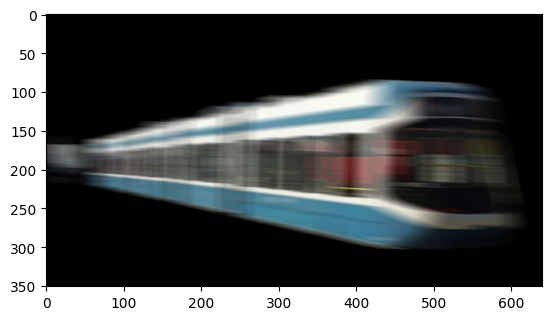

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val fg blurred/000000006040.jpg')
plt.imshow(original_img)

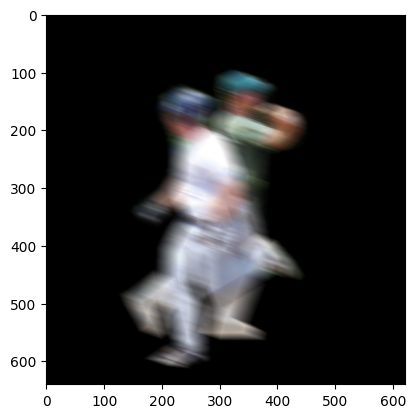

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val fg blurred/000000000872.jpg')
plt.imshow(original_img)

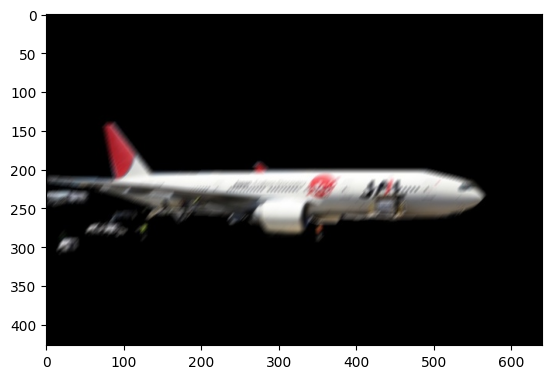

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val fg blurred/000000013348.jpg')
plt.imshow(original_img)

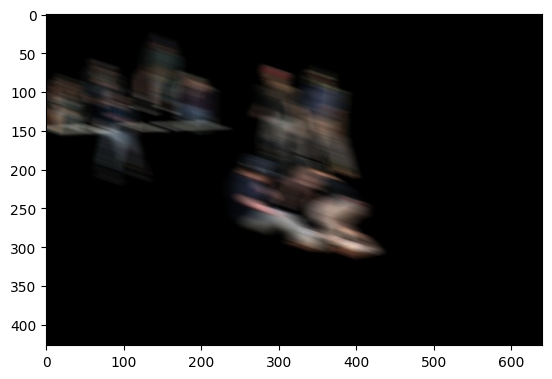

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val fg blurred/000000018491.jpg')
plt.imshow(original_img)

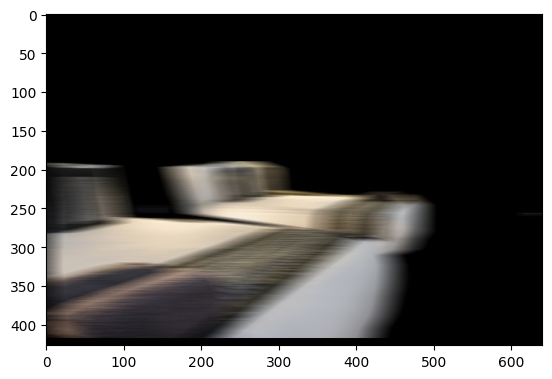

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val fg blurred/000000007795.jpg')
plt.imshow(original_img)

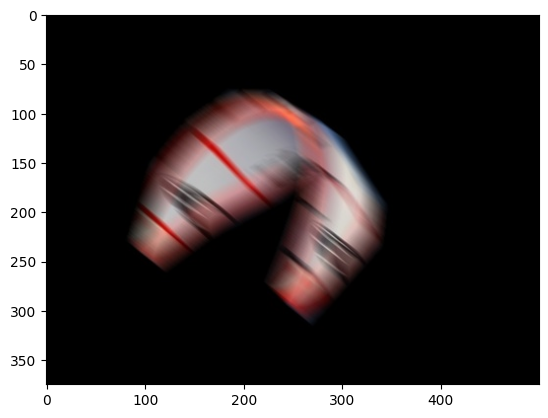

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/val fg blurred/000000007784.jpg')
plt.imshow(original_img)

# Matching the blurred foreground with its corresponding background

In [ ]:
import json
from pycocotools.coco import COCO
import cv2
import numpy as np
import os

# Load the COCO annotations
ann_file = "C:/Users/mukun/Desktop/Workshop Image Dataset Generation/DATASET/annotations_trainval2017/annotations/instances_train2017.json"
coco = COCO(ann_file)

# Load the image
img_dir = "C:/Users/mukun/Desktop/Workshop Image Dataset Generation/train2017/train2017"
fg_dir = "C:/Users/mukun/Desktop/Workshop Image Dataset Generation/GOOD RESULTS/TRAIN/train fg blurred"
bg_dir = "C:/Users/mukun/Desktop/Workshop Image Dataset Generation/GOOD RESULTS/TRAIN/train bg separation"

# Get all image IDs in the dataset
img_ids = coco.imgs.keys()

# Iterate over the image IDs
for img_id in img_ids:
    # Load the foreground image
    fg_img = cv2.imread(os.path.join(fg_dir, '%012d.jpg' % img_id))

    # Load the background image
    bg_img = cv2.imread(os.path.join(bg_dir, '%012d.jpg' % img_id))

    # Superimpose the foreground image on the background image
    result = cv2.addWeighted(fg_img, 0.5, bg_img, 0.5, 0)

    # Save the output image
    cv2.imwrite(os.path.join("C:/Users/mukun/Desktop/Workshop Image Dataset Generation/completed train 2017", '%012d.jpg' % img_id), result)

## Examples

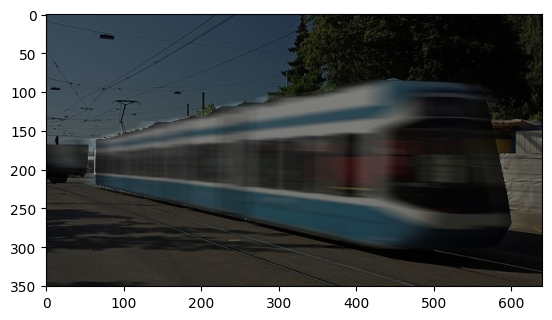

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/completed val 2017/000000006040.jpg')
plt.imshow(original_img)

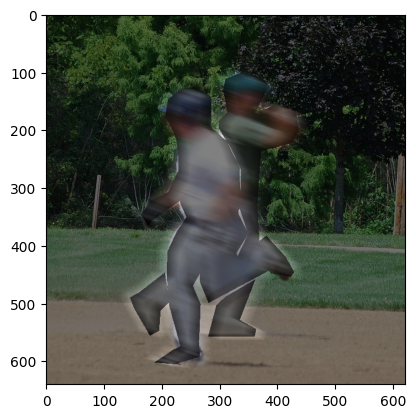

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/completed val 2017/000000000872.jpg')
plt.imshow(original_img)

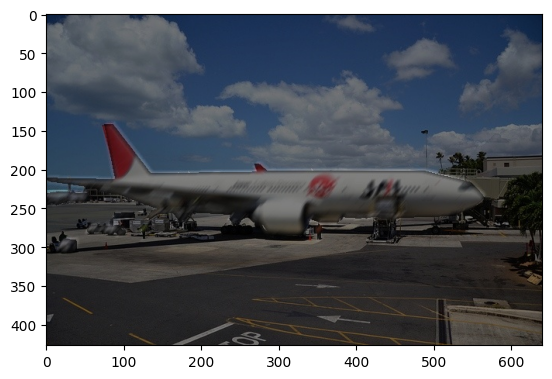

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/completed val 2017/000000013348.jpg')
plt.imshow(original_img)

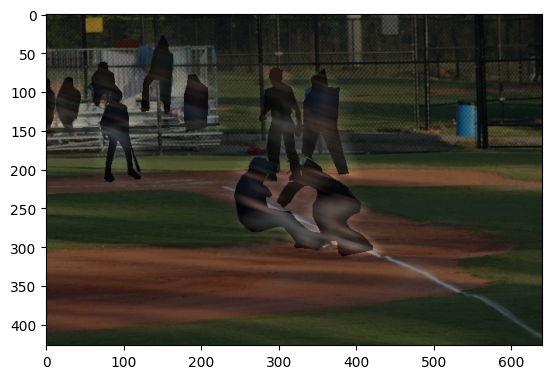

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/completed val 2017/000000018491.jpg')
plt.imshow(original_img)

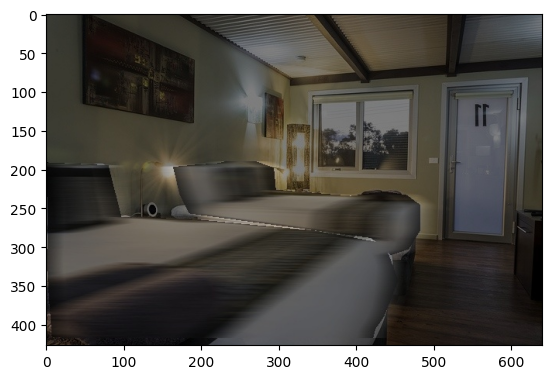

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/completed val 2017/000000007795.jpg')
plt.imshow(original_img)

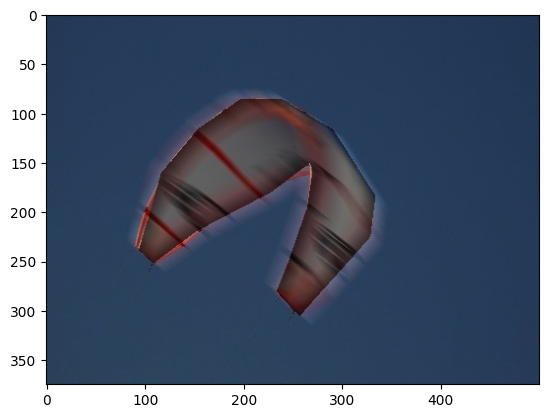

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_img = mpimg.imread('/media/hrishikesh/Elements/VALIDATION/completed val 2017/000000007784.jpg')
plt.imshow(original_img)